In [1]:
import pandas as pd

# Try reading the file (replace with your exact filename if different)
data = pd.read_csv('INvideos.csv', encoding='utf-8')

# Show first few rows
data.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [2]:
# Convert publish_time to datetime
data['publish_time'] = pd.to_datetime(data['publish_time'], errors='coerce')

# Convert trending_date (which is in 'yy.dd.mm' format) to datetime
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m', errors='coerce')

# Check for missing values
missing_summary = data.isnull().sum()

# Drop rows with missing essential dates
data = data.dropna(subset=['publish_time', 'trending_date'])

# Drop duplicates
data.drop_duplicates(inplace=True)

# Show cleaned info
print("✅ Data cleaned successfully.")
missing_summary


✅ Data cleaned successfully.


video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64

In [3]:
# Feature: Days it took to trend
data['days_to_trend'] = (data['trending_date'] - data['publish_time']).dt.days

# Features from publish_time
data['publish_hour'] = data['publish_time'].dt.hour
data['publish_day'] = data['publish_time'].dt.day
data['publish_month'] = data['publish_time'].dt.month
data['publish_weekday'] = data['publish_time'].dt.day_name()

# Features from trending_date
data['trending_weekday'] = data['trending_date'].dt.day_name()

print("✅ Feature engineering completed.")
data[['days_to_trend', 'publish_hour', 'publish_day', 'publish_month', 'publish_weekday', 'trending_weekday']].head()


TypeError: Cannot subtract tz-naive and tz-aware datetime-like objects.

In [4]:
# Remove timezone info from publish_time if present
data['publish_time'] = data['publish_time'].dt.tz_localize(None)

# Now safely compute the difference
data['days_to_trend'] = (data['trending_date'] - data['publish_time']).dt.days

# Extract datetime features
data['publish_hour'] = data['publish_time'].dt.hour
data['publish_day'] = data['publish_time'].dt.day
data['publish_month'] = data['publish_time'].dt.month
data['publish_weekday'] = data['publish_time'].dt.day_name()

data['trending_weekday'] = data['trending_date'].dt.day_name()

print("✅ Feature engineering successful.")
data[['days_to_trend', 'publish_hour', 'publish_month', 'publish_weekday']].head()


✅ Feature engineering successful.


,days_to_trend,publish_hour,publish_month,publish_weekday
0,1,12,11,Sunday
1,0,5,11,Monday
2,1,15,11,Sunday
3,1,7,11,Sunday
4,0,1,11,Monday


In [5]:
# Dataset summary
print(data.shape)
print(data.columns)
data.info()
data.describe()


(33089, 22)
Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'days_to_trend',
       'publish_hour', 'publish_day', 'publish_month', 'publish_weekday',
       'trending_weekday'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 33089 entries, 0 to 37330
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   video_id                33089 non-null  object        
 1   trending_date           33089 non-null  datetime64[ns]
 2   title                   33089 non-null  object        
 3   channel_title           33089 non-null  object        
 4   category_id             33089 non-null  int64         
 5   publish_time            33089 non-null  datetime6

,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,days_to_trend,publish_hour,publish_day,publish_month
count,33089,33089.000000,33089,3.308900e+04,3.308900e+04,3.308900e+04,33089.000000,33089.000000,33089.000000,33089.000000,33089.000000
mean,2018-02-18 22:20:07.434494720,21.628154,2018-02-17 06:46:56.464595712,9.963425e+05,2.558762e+04,1.576535e+03,2524.777660,1.109825,10.610505,15.809453,5.488622
min,2017-11-14 00:00:00,1.000000,2017-05-27 20:27:30,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,-1.000000,0.000000,1.000000,1.000000
25%,2017-12-27 00:00:00,23.000000,2017-12-25 15:00:00,1.127190e+05,7.870000e+02,9.800000e+01,72.000000,0.000000,6.000000,8.000000,2.000000
50%,2018-02-14 00:00:00,24.000000,2018-02-12 04:54:23,2.750270e+05,2.757000e+03,2.890000e+02,298.000000,1.000000,11.000000,16.000000,4.000000
75%,2018-04-14 00:00:00,24.000000,2018-04-12 12:00:04,7.320220e+05,1.201100e+04,9.320000e+02,1169.000000,2.000000,14.000000,23.000000,11.000000
max,2018-06-14 00:00:00,43.000000,2018-06-13 18:05:15,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,220.000000,23.000000,31.000000,12.000000
std,NaN,6.493615,NaN,3.148111e+06,9.647320e+04,1.689573e+04,14769.825108,2.155865,5.226906,8.692738,4.094249


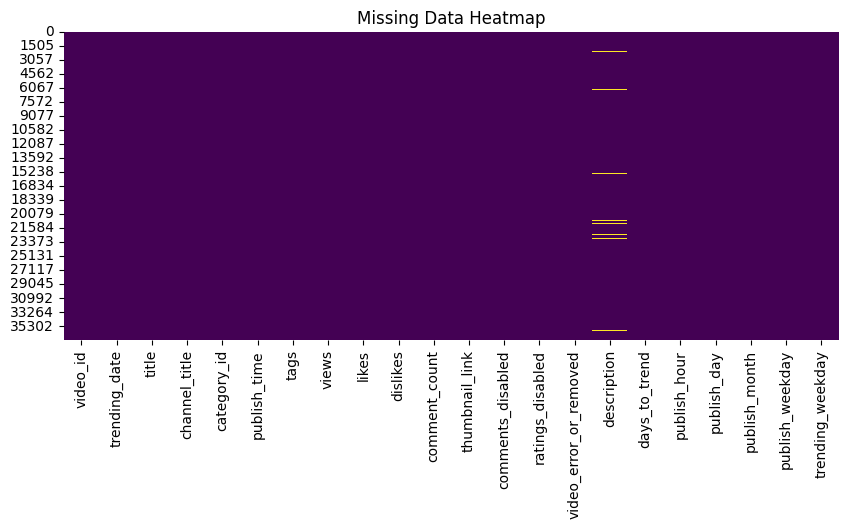

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               527
days_to_trend               0
publish_hour                0
publish_day                 0
publish_month               0
publish_weekday             0
trending_weekday            0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visual check for nulls
plt.figure(figsize=(10, 4))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

# Actual count
data.isnull().sum()


In [7]:
data['category'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top Categories by Video Count')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.show()


KeyError: 'category'

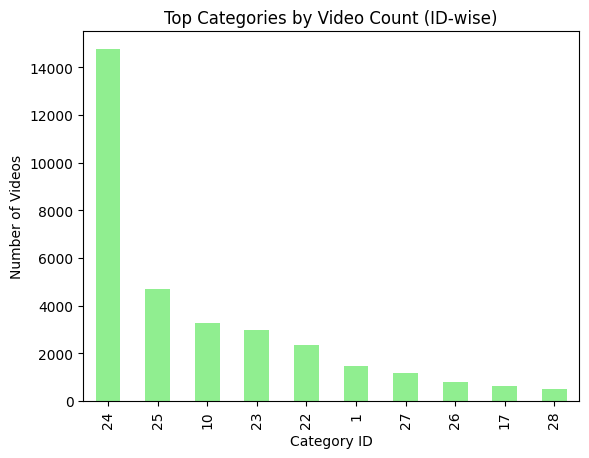

In [8]:
# Check distribution by category ID (not names yet)
data['category_id'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Top Categories by Video Count (ID-wise)')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.show()


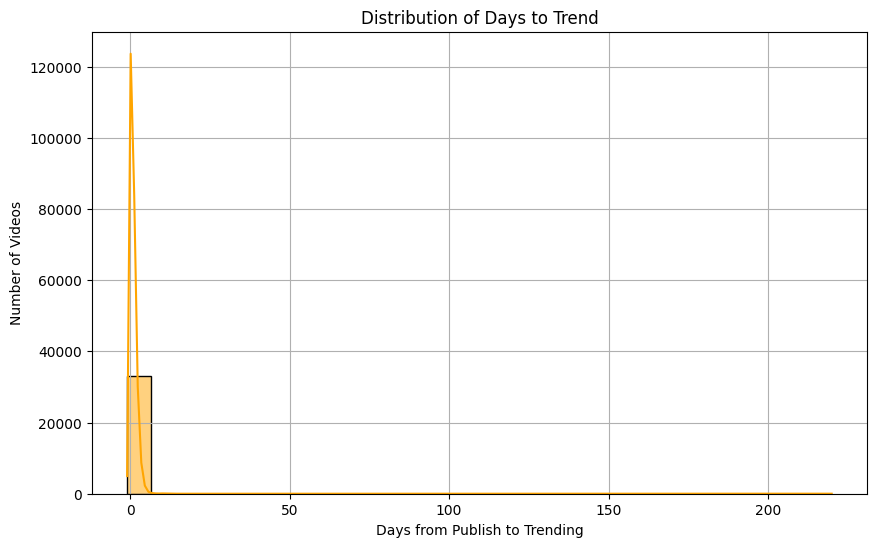

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['days_to_trend'].dropna(), bins=30, kde=True, color='orange')
plt.title("Distribution of Days to Trend")
plt.xlabel("Days from Publish to Trending")
plt.ylabel("Number of Videos")
plt.grid(True)
plt.show()


In [10]:
# First few rows
data.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,days_to_trend,publish_hour,publish_day,publish_month,publish_weekday,trending_weekday
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,...,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,1,12,12,11,Sunday,Tuesday
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,...,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",0,5,13,11,Monday,Tuesday
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,...,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,1,15,12,11,Sunday,Tuesday
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,...,False,False,False,This video showcases the difference between pe...,1,7,12,11,Sunday,Tuesday
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,...,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,0,1,13,11,Monday,Tuesday


In [11]:
# Shape and data types
print("Shape:", data.shape)
print("\nData Types:\n", data.dtypes)


Shape: (33089, 22)

Data Types:
 video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
days_to_trend                      int64
publish_hour                       int32
publish_day                        int32
publish_month                      int32
publish_weekday                   object
trending_weekday                  object
dtype: object


In [12]:
# Summary statistics
data.describe(include='all')


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,days_to_trend,publish_hour,publish_day,publish_month,publish_weekday,trending_weekday
count,33089,33089,33089,33089,33089.000000,33089,33089,3.308900e+04,3.308900e+04,3.308900e+04,...,33089,33089,33089,32562,33089.000000,33089.000000,33089.000000,33089.000000,33089,33089
unique,16307,NaN,16721,1426,NaN,NaN,12578,NaN,NaN,NaN,...,2,2,2,13992,NaN,NaN,NaN,NaN,7,7
top,#NAME?,NaN,Nandhini | Today @ 9 pm | Sun TV,VikatanTV,NaN,NaN,[none],NaN,NaN,NaN,...,False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,NaN,NaN,NaN,NaN,Friday,Saturday
freq,442,NaN,15,208,NaN,NaN,1273,NaN,NaN,NaN,...,31984,32378,33080,150,NaN,NaN,NaN,NaN,5573,5036
mean,NaN,2018-02-18 22:20:07.434494720,NaN,NaN,21.628154,2018-02-17 06:46:56.464595712,NaN,9.963425e+05,2.558762e+04,1.576535e+03,...,NaN,NaN,NaN,NaN,1.109825,10.610505,15.809453,5.488622,NaN,NaN
min,NaN,2017-11-14 00:00:00,NaN,NaN,1.000000,2017-05-27 20:27:30,NaN,4.024000e+03,0.000000e+00,0.000000e+00,...,NaN,NaN,NaN,NaN,-1.000000,0.000000,1.000000,1.000000,NaN,NaN
25%,NaN,2017-12-27 00:00:00,NaN,NaN,23.000000,2017-12-25 15:00:00,NaN,1.127190e+05,7.870000e+02,9.800000e+01,...,NaN,NaN,NaN,NaN,0.000000,6.000000,8.000000,2.000000,NaN,NaN
50%,NaN,2018-02-14 00:00:00,NaN,NaN,24.000000,2018-02-12 04:54:23,NaN,2.750270e+05,2.757000e+03,2.890000e+02,...,NaN,NaN,NaN,NaN,1.000000,11.000000,16.000000,4.000000,NaN,NaN
75%,NaN,2018-04-14 00:00:00,NaN,NaN,24.000000,2018-04-12 12:00:04,NaN,7.320220e+05,1.201100e+04,9.320000e+02,...,NaN,NaN,NaN,NaN,2.000000,14.000000,23.000000,11.000000,NaN,NaN
max,NaN,2018-06-14 00:00:00,NaN,NaN,43.000000,2018-06-13 18:05:15,NaN,1.254322e+08,2.912710e+06,1.545017e+06,...,NaN,NaN,NaN,NaN,220.000000,23.000000,31.000000,12.000000,NaN,NaN


In [13]:
# Missing values per column
data.isnull().sum()


video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               527
days_to_trend               0
publish_hour                0
publish_day                 0
publish_month               0
publish_weekday             0
trending_weekday            0
dtype: int64

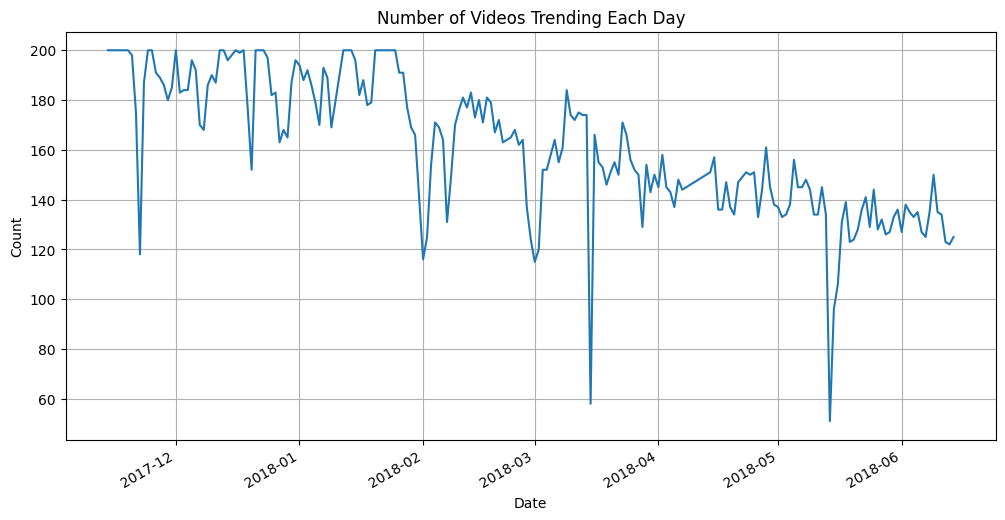

In [14]:
# Convert trending_date if not already done
data['trending_date'] = pd.to_datetime(data['trending_date'], format='%y.%d.%m')

# Count how many videos trended each day
data['trending_date'].value_counts().sort_index().plot(figsize=(12, 6))
plt.title("Number of Videos Trending Each Day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid(True)
plt.show()


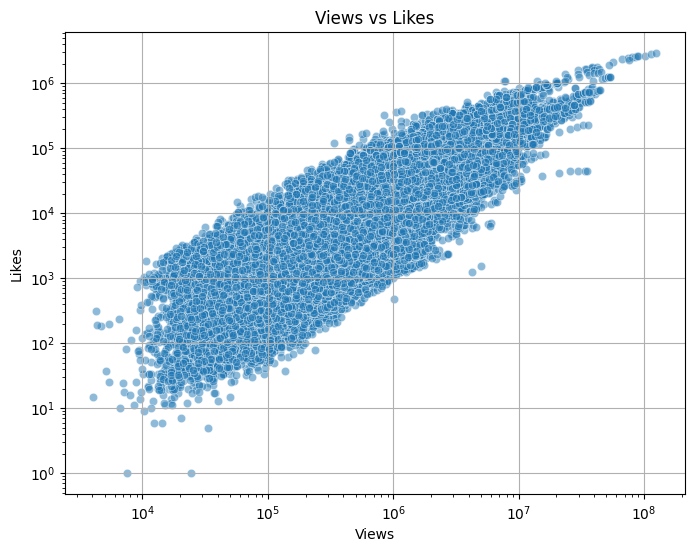

In [16]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='views', y='likes', alpha=0.5)
plt.title("Views vs Likes")
plt.xlabel("Views")
plt.ylabel("Likes")
plt.xscale('log')  # Optional: Log scale for better visualization
plt.yscale('log')
plt.grid(True)
plt.show()


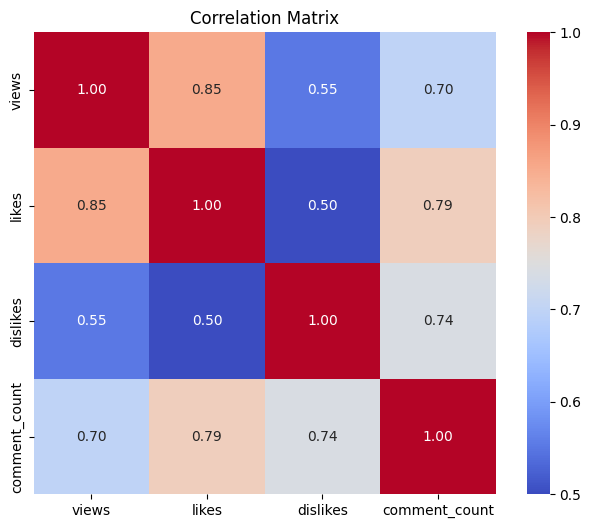

In [17]:
# Select relevant numeric columns
numeric_cols = ['views', 'likes', 'dislikes', 'comment_count']

# Compute correlation matrix
corr = data[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()


C:\Users\dell3\AppData\Local\Temp\ipykernel_29480\310498675.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_views, y='title', x='views', palette='viridis')


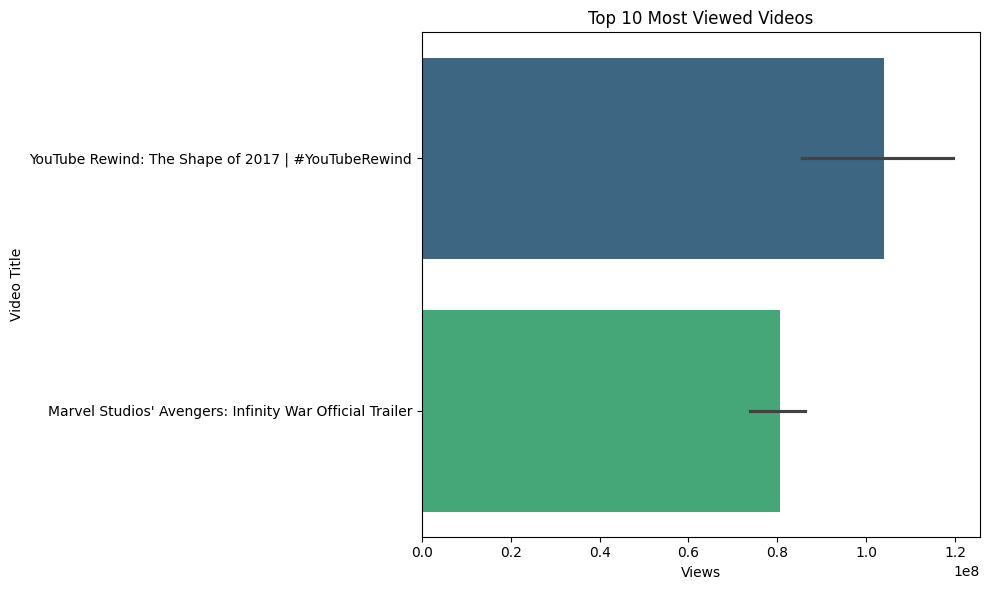

In [18]:
# Select required columns and sort by views
top_views = data[['title', 'channel_title', 'views']] \
    .sort_values(by='views', ascending=False) \
    .drop_duplicates() \
    .head(10)

# Plot the top 10 most viewed videos
plt.figure(figsize=(10, 6))
sns.barplot(data=top_views, y='title', x='views', palette='viridis')
plt.title('Top 10 Most Viewed Videos')
plt.xlabel('Views')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()


C:\Users\dell3\AppData\Local\Temp\ipykernel_29480\1346346773.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_likes, y='title', x='likes', palette='magma')


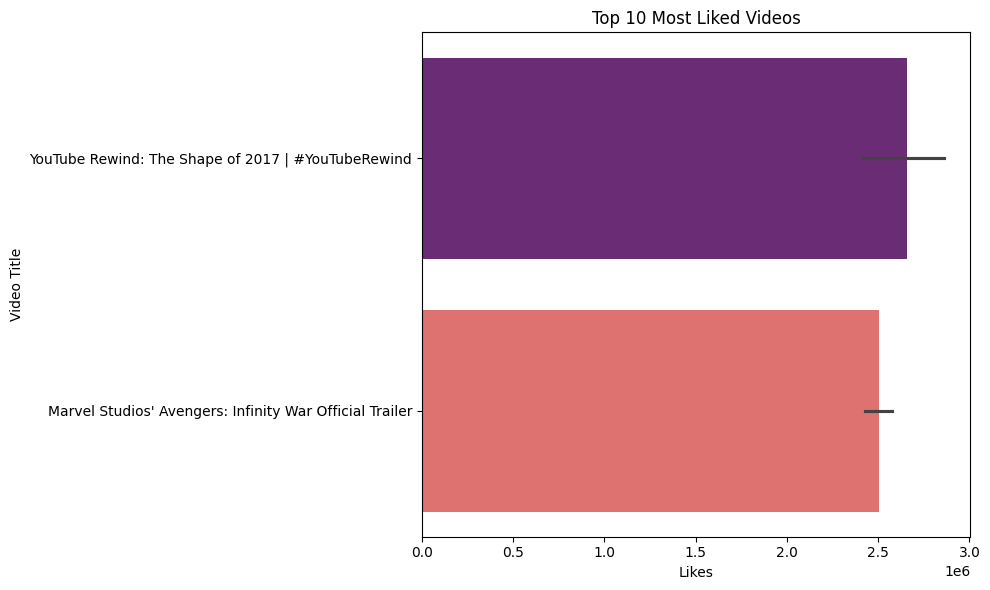

In [19]:
# Select required columns and sort by likes
top_likes = data[['title', 'channel_title', 'likes']] \
    .sort_values(by='likes', ascending=False) \
    .drop_duplicates() \
    .head(10)

# Plot the top 10 most liked videos
plt.figure(figsize=(10, 6))
sns.barplot(data=top_likes, y='title', x='likes', palette='magma')
plt.title('Top 10 Most Liked Videos')
plt.xlabel('Likes')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()


C:\Users\dell3\AppData\Local\Temp\ipykernel_29480\590523493.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_comments, y='title', x='comment_count', palette='coolwarm')
C:\Users\dell3\AppData\Local\Temp\ipykernel_29480\590523493.py:13: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dell3\anaconda3\envs\yt_project\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


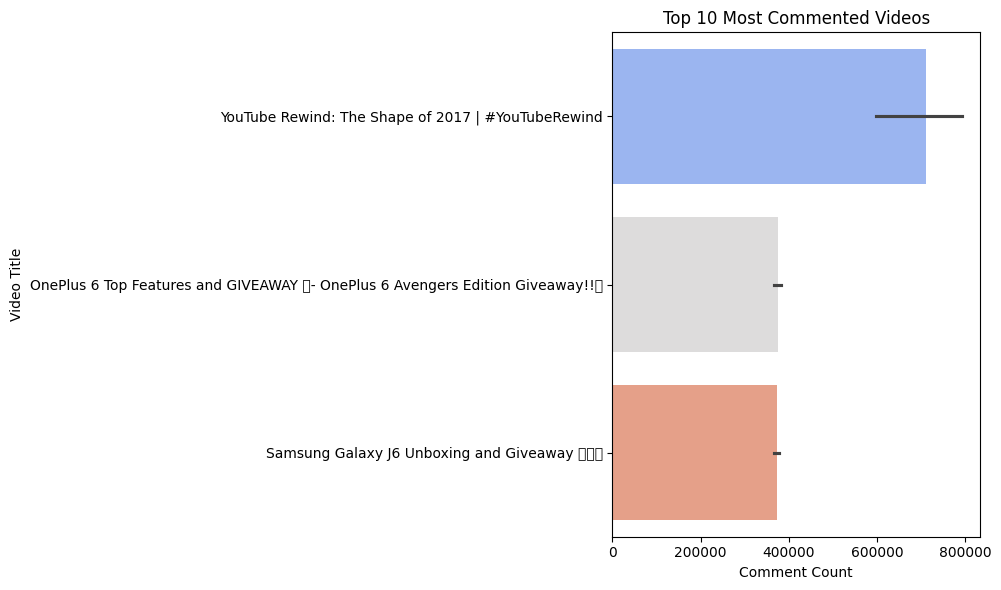

In [20]:
# Select required columns and sort by comment count
top_comments = data[['title', 'channel_title', 'comment_count']] \
    .sort_values(by='comment_count', ascending=False) \
    .drop_duplicates() \
    .head(10)

# Plot the top 10 most commented videos
plt.figure(figsize=(10, 6))
sns.barplot(data=top_comments, y='title', x='comment_count', palette='coolwarm')
plt.title('Top 10 Most Commented Videos')
plt.xlabel('Comment Count')
plt.ylabel('Video Title')
plt.tight_layout()
plt.show()


In [21]:
# Convert publish_time to datetime (if not done yet)
data['publish_time'] = pd.to_datetime(data['publish_time'], utc=True)

# Extract hour and weekday
data['publish_hour'] = data['publish_time'].dt.hour
data['publish_day'] = data['publish_time'].dt.day_name()


C:\Users\dell3\AppData\Local\Temp\ipykernel_29480\1305810610.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='publish_hour', palette='Blues')


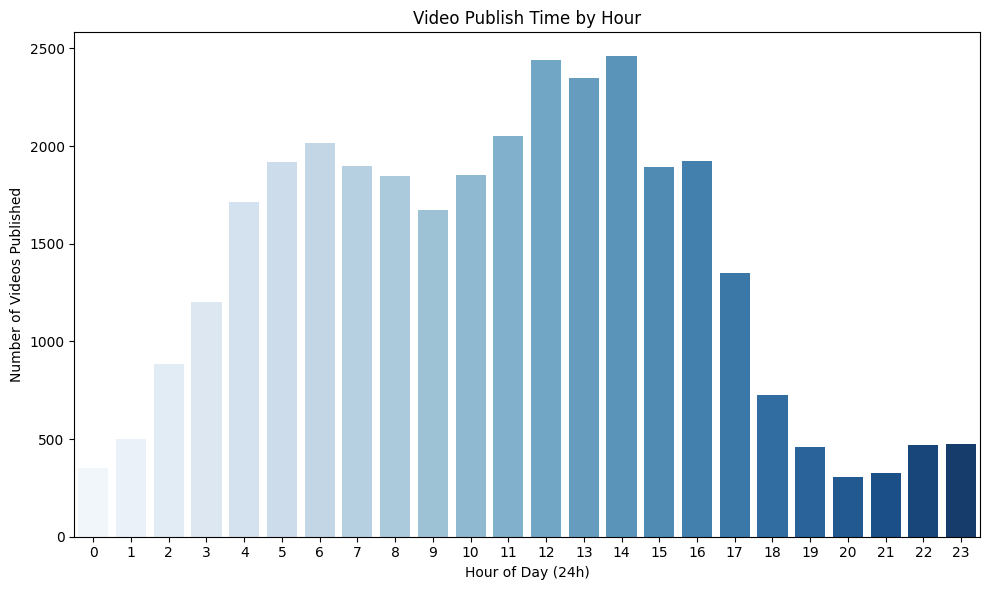

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='publish_hour', palette='Blues')
plt.title('Video Publish Time by Hour')
plt.xlabel('Hour of Day (24h)')
plt.ylabel('Number of Videos Published')
plt.tight_layout()
plt.show()


C:\Users\dell3\AppData\Local\Temp\ipykernel_29480\1901075226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='publish_day', order=order, palette='Purples')


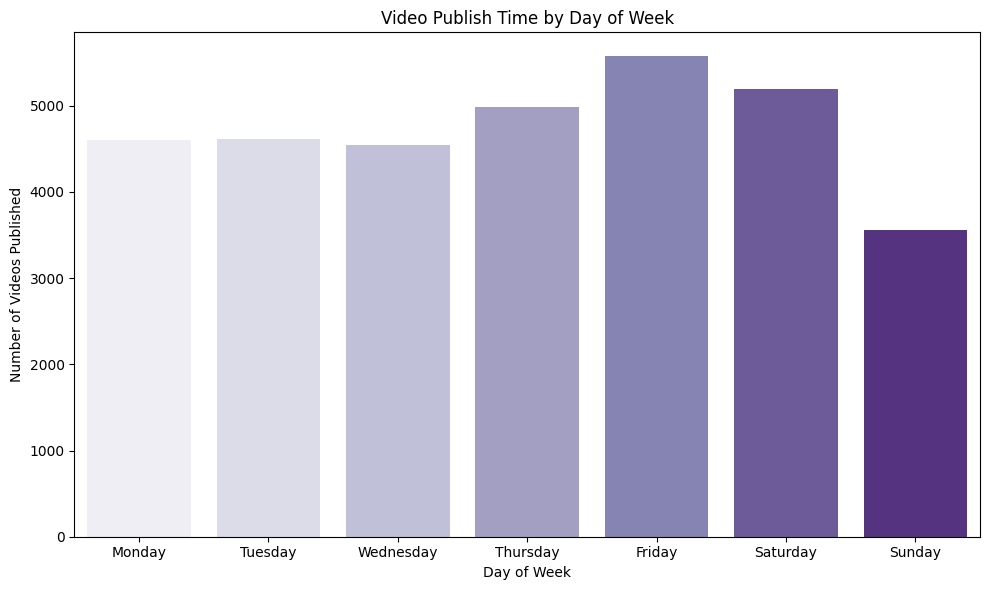

In [23]:
plt.figure(figsize=(10, 6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=data, x='publish_day', order=order, palette='Purples')
plt.title('Video Publish Time by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Videos Published')
plt.tight_layout()
plt.show()


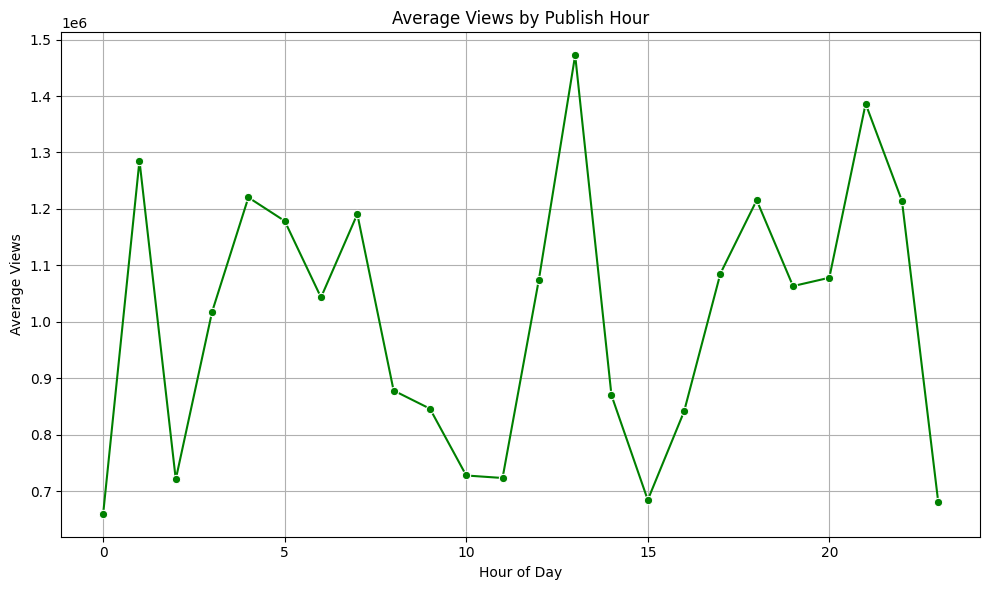

In [24]:
hourly_views = data.groupby('publish_hour')['views'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_views, x='publish_hour', y='views', marker='o', color='green')
plt.title('Average Views by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Views')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\dell3\AppData\Local\Temp\ipykernel_29480\3567981345.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels_by_count.values, y=top_channels_by_count.index, palette='crest')


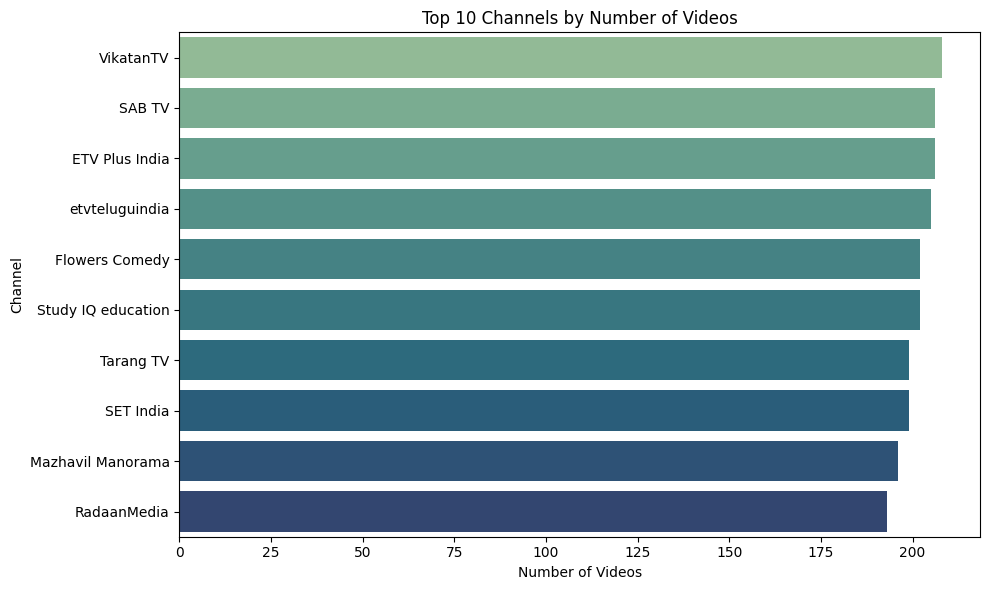

In [25]:
# Get the top 10 channels by number of videos in the dataset
top_channels_by_count = data['channel_title'].value_counts().head(10)

# Plot the bar chart of top 10 channels
plt.figure(figsize=(10, 6))
sns.barplot(x=top_channels_by_count.values, y=top_channels_by_count.index, palette='crest')
plt.title('Top 10 Channels by Number of Videos')
plt.xlabel('Number of Videos')
plt.ylabel('Channel')
plt.tight_layout()
plt.show()


C:\Users\dell3\AppData\Local\Temp\ipykernel_29480\22187822.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels_by_avg_views.values, y=top_channels_by_avg_views.index, palette='flare')


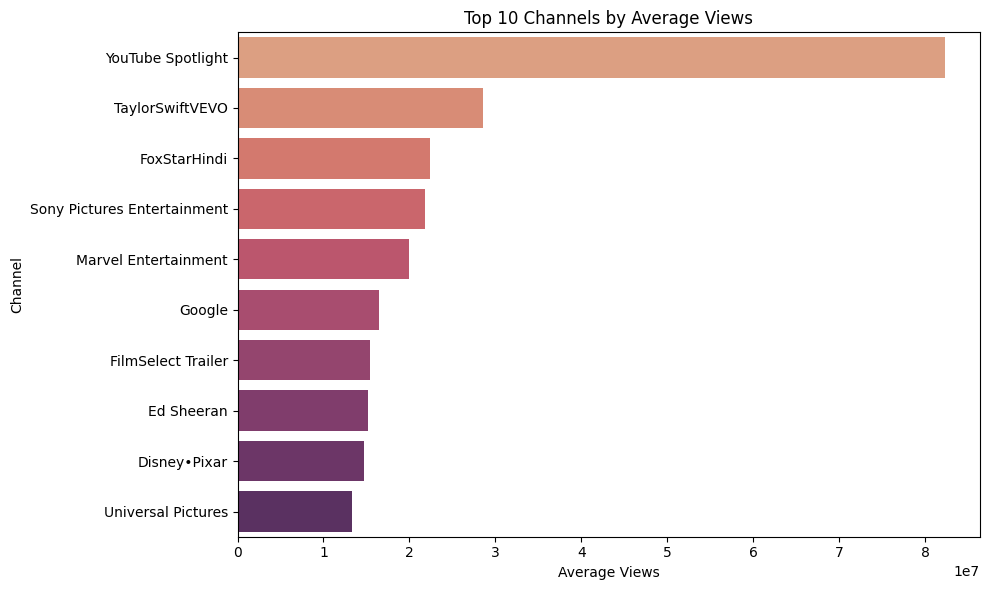

In [26]:
# Group by channel title and calculate average views per video
top_channels_by_avg_views = data.groupby('channel_title')['views'] \
                                .mean() \
                                .sort_values(ascending=False) \
                                .head(10)

# Plot the bar chart for channels with highest average views
plt.figure(figsize=(10, 6))
sns.barplot(x=top_channels_by_avg_views.values, y=top_channels_by_avg_views.index, palette='flare')
plt.title('Top 10 Channels by Average Views')
plt.xlabel('Average Views')
plt.ylabel('Channel')
plt.tight_layout()
plt.show()


C:\Users\dell3\AppData\Local\Temp\ipykernel_29480\3000970071.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trending_counts.values, y=trending_counts.index, palette='viridis')


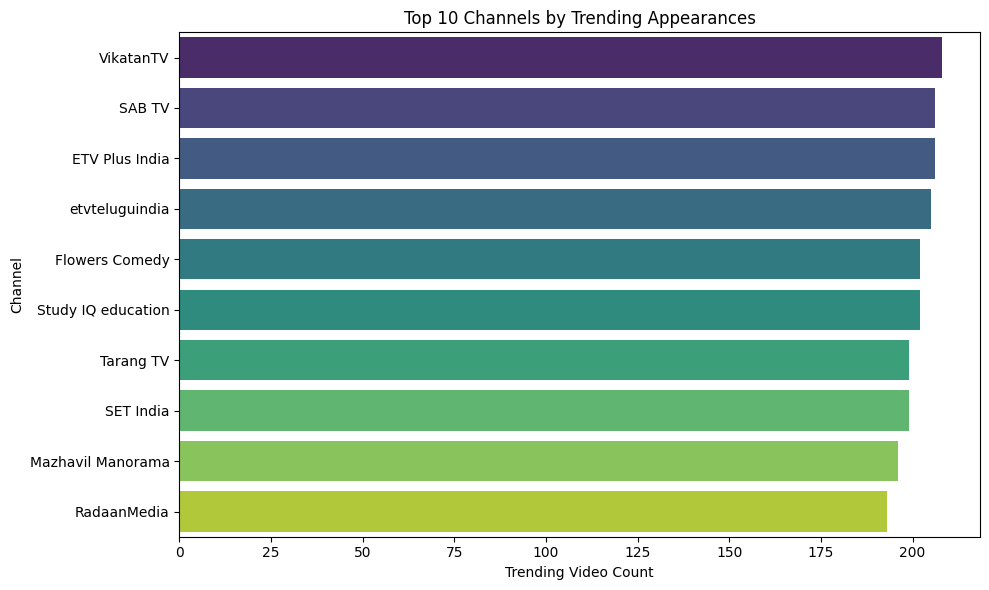

In [27]:
# Count how many times each channel appears in the trending dataset
trending_counts = data['channel_title'].value_counts().head(10)

# Plot the bar chart for channels with most trending appearances
plt.figure(figsize=(10, 6))
sns.barplot(x=trending_counts.values, y=trending_counts.index, palette='viridis')
plt.title('Top 10 Channels by Trending Appearances')
plt.xlabel('Trending Video Count')
plt.ylabel('Channel')
plt.tight_layout()
plt.show()


In [28]:
from wordcloud import WordCloud, STOPWORDS

# Combine all video titles into a single string
title_text = " ".join(data['title'].dropna().astype(str))

# Generate the word cloud while removing common stopwords like 'the', 'and', etc.
wordcloud_title = WordCloud(width=800, height=400, background_color='white',
                            stopwords=STOPWORDS).generate(title_text)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Video Titles')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

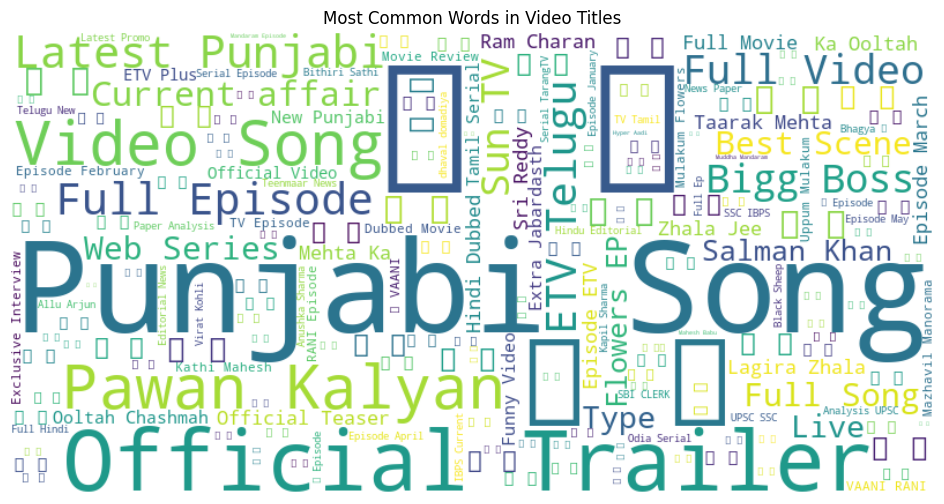

In [29]:
from wordcloud import WordCloud, STOPWORDS

# Combine all video titles into a single string
title_text = " ".join(data['title'].dropna().astype(str))

# Generate the word cloud while removing common stopwords like 'the', 'and', etc.
wordcloud_title = WordCloud(width=800, height=400, background_color='white',
                            stopwords=STOPWORDS).generate(title_text)

# Display the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Video Titles')
plt.show()


C:\Users\dell3\AppData\Local\Temp\ipykernel_29480\2479691926.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Tag', data=top_tags, palette='magma')


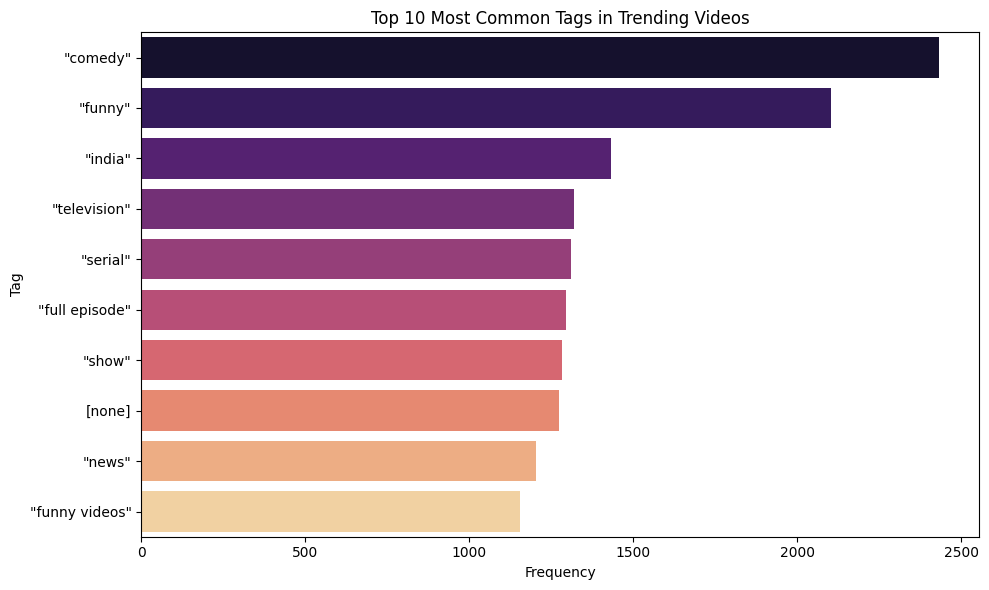

In [30]:
from collections import Counter

# Split all tags into individual tag words, remove "|", and flatten into one list
all_tags = data['tags'].dropna().astype(str).str.lower().str.split('|').sum()

# Count frequency of each tag
tag_counts = Counter(all_tags)

# Convert to a DataFrame for easy plotting
top_tags = pd.DataFrame(tag_counts.most_common(10), columns=['Tag', 'Count'])

# Plot top tags
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Tag', data=top_tags, palette='magma')
plt.title('Top 10 Most Common Tags in Trending Videos')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.tight_layout()
plt.show()
